<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [10]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [11]:
# Your code here
from bs4 import BeautifulSoup 
import requests 
import pandas as pd

Download the webpage at the url


In [12]:
#your code goes here

data  = requests.get(url).text 

Create a soup object


In [13]:
#your code goes here

soup = BeautifulSoup(data)  

Scrape the `Language name` and `annual average salary`.


In [14]:
#your code goes here

table = soup.find('table')
popular_languages = []

for row in table.find_all('tr'): 
    
    cols = row.find_all('td') 
    language = cols[1].getText() 
    avg_salary = cols[3].getText() 
    popular_languages.append(str(language) + ' , ' + str(avg_salary).replace('$','').replace(',',''))

popular_languages

['Language , Average Annual Salary',
 'Python , 114383',
 'Java , 101013',
 'R , 92037',
 'Javascript , 110981',
 'Swift , 130801',
 'C++ , 113865',
 'C# , 88726',
 'PHP , 84727',
 'SQL , 84793',
 'Go , 94082']

Save the scrapped data into a file named *popular-languages.csv*


In [15]:
# your code goes here
df = pd.DataFrame(popular_languages)
df.to_csv('popular-languages.csv', header=True, index=False)
df=df.iloc[1: , :]
df.head()

,0
1,"Python , 114383"
2,"Java , 101013"
3,"R , 92037"
4,"Javascript , 110981"
5,"Swift , 130801"


In [32]:
#Present that data using a bar chart here. Order the bar chart in the descending order of salary

import matplotlib.pyplot as plt

df[['Language', 'Average Annual Salary']] = df[0].str.split(',', expand=True)
df['Language'] = df['Language'].astype('string')
df['Average Annual Salary'] = df['Average Annual Salary'].astype('float')
df = df.sort_values('Average Annual Salary', ascending = False)
print(df.head())
print(df.dtypes)

                     0     Language  Average Annual Salary
5       Swift , 130801       Swift                130801.0
1      Python , 114383      Python                114383.0
6         C++ , 113865         C++                113865.0
4  Javascript , 110981  Javascript                110981.0
2        Java , 101013        Java                101013.0
0                         object
Language                  string
Average Annual Salary    float64
dtype: object


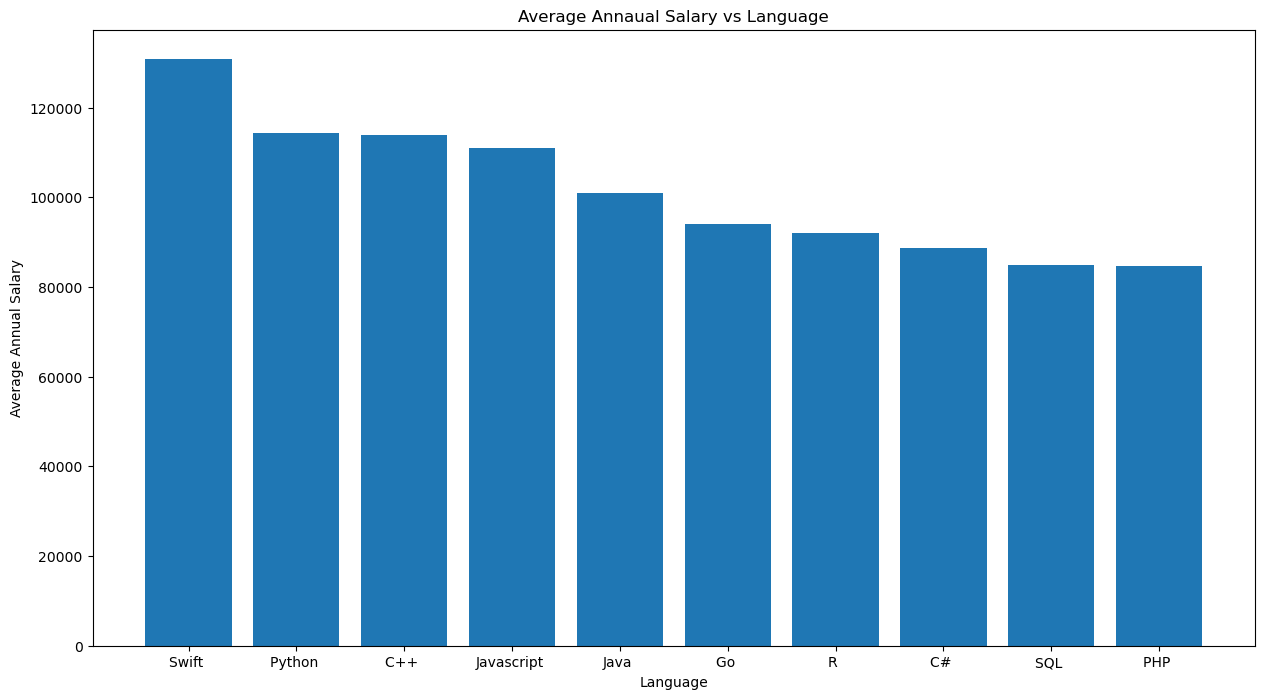

In [39]:
plt.figure(figsize=(15,8))
plt.bar(df['Language'], df['Average Annual Salary'])
plt.xlabel('Language')
plt.ylabel('Average Annual Salary')
plt.title('Average Annaual Salary vs Language')
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
